# Choose best hyperparameters for solver.py

### Load labels to df

In [17]:
import pandas as pd

LABELS_PATH = '../data/KP_samples_with_resistance_tab.xlsx'

# convert excel to pandas dataframe
df = pd.read_excel(LABELS_PATH, header=1)

df.head()

,barcode,vzorek,počet čtení,aph(6)-Id,aph(3'')-Ib,rezistence,aac(3)-IIa,aac(3)-IId,rezistence.1,tet(A),tet(D),rezistence.2
0,barcode20,KP1622,126101,1,1,ANO,1,0,ANO,1,0,ANO
1,barcode21,KP1645,99659,1,1,ANO,1,0,ANO,0,0,NE
2,barcode22,KP1651,92647,1,1,ANO,0,0,NE,1,0,ANO
3,barcode23,KP1658,135794,1,1,ANO,0,0,NE,1,0,ANO
4,barcode24,KP1880,153100,0,0,NE,0,0,NE,0,0,NE


### Run solver for each configuration

In [35]:
# descend to parent dir
import sys
import os
sys.path.insert(1, os.path.abspath( os.path.dirname(__file__)) )

import pandas as pd
from solver import solve, mock_solve

# Choose mock method (optional)
solve = mock_solve

n_similar_vectors = [1, 5, 10, 50, 100]
avg_accuracies = []  # avg per every barcode for each hyper parameter

def get_accuracy(result: dict[dict[str: bool]], df: pd.DataFrame) -> float:
    accuracies = []
    for barcode_name, bacterias in result.items():
        correct_fields = []
        for bacteria_name, detected in bacterias.items():
            label = df[df['barcode'] == barcode_name][bacteria_name].values[0]
            is_correct = label == detected
            correct_fields.append(is_correct)
        accuracies.append(sum(correct_fields) / len(correct_fields))
    return accuracies

def get_avg_accuracy(result: dict[dict[str: bool]], df: pd.DataFrame) -> float:
    accuracies = get_accuracy(result, df)
    return sum(accuracies) / len(accuracies)

for n in n_similar_vectors:
    # Solve
    result = solve(n)
    # Calculate avg accuracy for each barcode
    avg_accuracy = get_avg_accuracy(result, df)
    avg_accuracies.append(avg_accuracy)

print(f"Average accuracies: {avg_accuracies}")

Average accuracies: [0.0, 0.3333333333333333, 0.5, 0.6666666666666666, 1.0]


### Plot the results

Text(0, 0.5, 'Mean Accuracy')

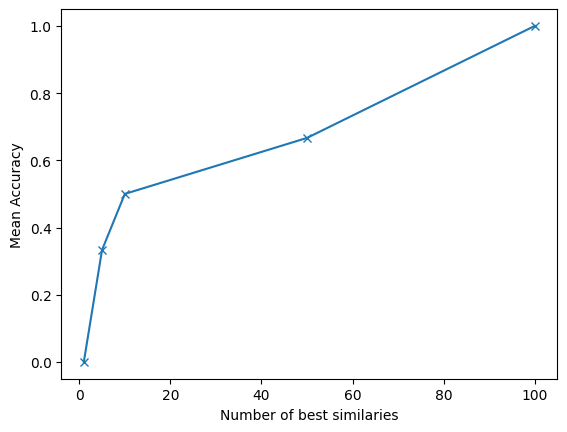

In [36]:
import matplotlib.pyplot as plt

# plot line graph
plt.plot(n_similar_vectors, avg_accuracies, marker='x')

# set labels
plt.xlabel('Number of best similaries')
plt.ylabel('Mean Accuracy')